In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import preprocessing
import math
from time import time
import operator
import cPickle as pickle
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
#function to detect z axis with max y axis
def z_max_y(df):
    t0= time()
    df = df.dropna(axis=0)
#     std = []
    unique_z = df['Start Z'].unique()
    
    std = [0] * len(unique_z)
    for i, z in enumerate(unique_z):
        std[i] = df[df['Start Z']==z]['Start Y'].std()
#     for z in unique_z:
#         std.append(df[df['Start Z']==z]['Start Y'].std())
#         #print df[df['Start Z']==z]['Start Y'].std()
        #print df[df['Start Z']==z]['Start Y']
    std_arr = np.array(std)
#     np.place(std_arr, std_arr==None, [0])
#     print std
    std_arr =np.nan_to_num(std_arr)
    max_ind = np.where(std_arr==std_arr.max())
#     max_ind = max(std.iteritems(), key=operator.itemgetter(1))[0]
#     print std_arr.max(), std_arr[max_ind]
    t1 = time()
#     print t1-t0
    return unique_z[max_ind][0]

In [12]:
#wing detection
def wing_detect(df):
    range_x = []
#     t0 = time()
#     size = []
    z_wing = z_max_y(df)
#     print z_wing
    df = df[(abs(df['Start Z']-z_wing)<.1)]
    for y_val in df['Start Y'].unique():
        data_fix = df[(df['Start Y']==y_val)]
#                     &(abs(df['Start Z']-z_wing)<0.001)]
#         size.append(data_fix.size)
        if data_fix.size>0:
            x_max =data_fix['Start X'].max()
            x_min = data_fix['Start X'].min()
            x_var = data_fix['Start X'].var()
            range_x.append(x_var)
#         size.append(data_fix.size)
#     print np.mean(size)
#     t1 = time()
#     print t1-t0
    return float(np.percentile(dat_new[col],90))/np.percentile(dat_new[col],10)
    

# Motorcycles

In [20]:
data= pd.read_csv('my_app/data/motorcycles/motor1.csv')
rel_col = ['Start X','Start Y','Start Z','End X','End Y','End Z']
data = data[rel_col]
data_1 = data[['Start X','Start Y','Start Z']]
data_2 = data[['End X','End Y','End Z']]
data_2.columns = ['Start X','Start Y','Start Z']
data_motor = pd.concat((data_1,data_2),axis=0)
data_motor = data_motor.dropna(axis=0)
data_motor_sc = (data_motor -data_motor.mean())/data_motor.std().mean()
data_motor_sc['number']= np.ones((data_motor.shape[0],1))
data_motor_sc.describe()

,Start X,Start Y,Start Z,number
count,7.447200e+04,7.447200e+04,7.447200e+04,74472
mean,1.044686e-13,-3.160037e-15,3.619690e-15,1
std,1.616390e+00,4.864709e-01,8.971393e-01,0
min,-3.263499e+00,-9.972832e-01,-2.423381e+00,1
25%,-1.427464e+00,-3.405788e-01,-5.825977e-01,1
50%,-2.327706e-01,-1.543896e-02,-1.835156e-02,1
75%,1.241532e+00,3.543937e-01,9.872357e-01,1
max,3.383712e+00,1.035120e+00,1.270197e+00,1


In [21]:
#generate rotational matrices
def rotateXMatrix(radians):
    """ Return matrix for rotating about the x-axis by 'radians' radians """
    
    c = np.cos(radians)
    s = np.sin(radians)
    return np.array([[1, 0, 0],
                     [0, c,-s],
                     [0, s, c]])

def rotateYMatrix(radians):
    """ Return matrix for rotating about the y-axis by 'radians' radians """
    
    c = np.cos(radians)
    s = np.sin(radians)
    return np.array([[ c, 0, s],
                     [ 0, 1, 0],
                     [-s, 0, c]])

def rotateZMatrix(radians):
    """ Return matrix for rotating about the z-axis by 'radians' radians """
    
    c = np.cos(radians)
    s = np.sin(radians)
    return np.array([[c,-s, 0],
                     [s, c, 0],
                     [0, 0, 1]])

# theta = 
# phi = 
# alpha =
# x_rot = np.array([[1,0,0],[0,np.cos(theta),-np.sin(theta)],[0,np.sin(theta),np.cos(theta)]])
# y_rot = np.array([[np.cos(phi),0,np.sin(phi)],[0,1,0],[-np.sin(phi),0,np.cos(phi)]])
# z_rot = np.array([[np.cos(alpha),-np.sin(alpha),0],[np.sin(alpha),-np.cos(theta)],[0,0,1]])

/Users/jerdph/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


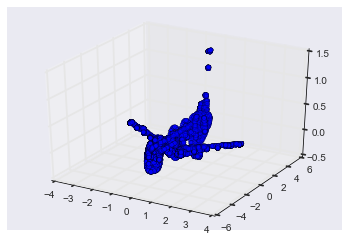

In [29]:
#Read Data
data= pd.read_csv('my_app/data/planes/plane30.csv')
rel_col = ['Start X','Start Y','Start Z','End X','End Y','End Z']
data = data[rel_col]
data_1 = data[['Start X','Start Y','Start Z']]
data_2 = data[['End X','End Y','End Z']]
data_2.columns = ['Start X','Start Y','Start Z']
data_motor = pd.concat((data_1,data_2),axis=0)
data_motor = data_motor.dropna(axis=0)
data_motor_sc = (data_motor-data_motor.mean())/data_motor.std().mean()
# find highest, lowest standard deviation vector

# highest = np.where(data_motor.std()==data_motor.std().max())[0][0]
# lowest = np.where(data_motor.std()==data_motor.std().min())[0][0]
# if highest == 1:
#     data_plot = np.dot(data_plot.values,rotateZMatrix(math.pi/2))
# elif highest == 2:
#     data_plot = np.dot(data_plot.values,rotateYMatrix(math.pi/2))
# if lowest == 0:
#     data_plot = np.dot(data_plot.values,rotateZMatrix(math.pi/2))
# elif highest == 2:
#     data_plot = np.dot(data_plot.values,rotateXMatrix(math.pi/2))
#PCA
# pca = PCA(n_components=3)
# data_motor_sc = pca.fit_transform(data_motor_sc)
# print pca.explained_variance_ratio_
#Plot
fig = plt.figure()
# data_plot = data_motor_sc.dropna(axis=0).drop('number',axis=1)
#transform
# for row in range(data_plot.shape[0]):
data_plot = pd.DataFrame(data_motor_sc, columns = ['Start X','Start Y','Start Z'])
ax = plt.axes(projection='3d')
x = data_plot['Start X']
y = data_plot['Start Y']
z = data_plot['Start Z']
ax.scatter(x, y, z)
plt.show()

In [11]:
#Extract Shape
motor_dict = {'width': [], 'height': [],'length':[],'number':[],
             'ratio_xy':[],'ratio_midz':[], 'ratio_mid_pts':[],
             'ratio_xz':[],'ratio_yz':[],'y_var_ratio':[]}
for i in xrange(1,100):
    if i%10==0:
        print i
    filename = 'data/motorcycles/motor'+str(i)+'.csv'
    load_dat = pd.read_csv(filename)
    dat_1 = load_dat[['Start X','Start Y','Start Z']]
    dat_2 = load_dat[['End X','End Y','End Z']]
    dat_2.columns = ['Start X','Start Y','Start Z']
    dat_new = pd.concat((dat_1,dat_2),axis=0)
    dat_new = dat_new.dropna(axis=0)
    columns = dat_new.columns
    dat_new = (dat_new -dat_new.mean())/np.linalg.norm(dat_new.values)
#     for col in columns:
#         try:
#             dat_new = dat_new[(dat_new[col]<np.percentile(dat_new[col],100))
#                           &(dat_new[col]>np.percentile(dat_new[col],0))]
#         except:
#             continue
    # find highest, lowest standard deviation vector and orient the model accordingly
    highest = np.where(dat_new.std()==dat_new.std().max())[0][0]
    lowest = np.where(dat_new.std()==dat_new.std().min())[0][0]
    if highest == 1:
        dat_new = np.dot(dat_new.values,rotateZMatrix(math.pi/2))
    elif highest == 2:
        dat_new = np.dot(dat_new.values,rotateYMatrix(math.pi/2))
    dat_new = pd.DataFrame(dat_new, columns = ['Start X','Start Y','Start Z'])
    if lowest == 0:
        dat_new = np.dot(dat_new.values,rotateZMatrix(math.pi/2))
    elif highest == 2:
        dat_new = np.dot(dat_new.values,rotateXMatrix(math.pi/2))
    dat_new = pd.DataFrame(dat_new, columns = ['Start X','Start Y','Start Z'])
    dat_new['number']= np.ones((dat_new.shape[0],1))*i
    #max and min xyz after scale
    max_x = dat_new['Start X'].max()
    max_y = dat_new['Start Y'].max()
    max_z = dat_new['Start Z'].max()
    min_x = dat_new['Start X'].min()
    min_y = dat_new['Start Y'].min()
    min_z = dat_new['Start Z'].min()
#     #calculate width height length
    width = max_y - min_y
    length = max_x - min_x
    height = max_z - min_z
    #ratio of length and width
    ratio_xy = float((max_y - min_y))/(
        max_x - min_x)
    ratio_xz = float((max_x - min_x))/(
        max_z - min_z)
    ratio_yz = float((max_y - min_y))/(
        max_z - min_z)
    #ratio of points above and below midpoint in the z direction
    midz = dat_new['Start Z'].mean()
    z_pts_above = dat_new[dat_new['Start Z']>midz]['Start Z'].count()
    z_pts_below = dat_new[dat_new['Start Z']<midz]['Start Z'].count()
    ratio_mid_pts = float(z_pts_above)/z_pts_below
    zabove = max_z - midz
    zbelow = midz - min_z
    ratio_midz = float(zabove)/zbelow
    #detect wings through diff of median and mean in the y direction
    y_var_ratio = wing_detect(dat_new)
    #append to dictionary
    motor_dict['width'].append(width)
    motor_dict['length'].append(length)
    motor_dict['height'].append(height)
    motor_dict['ratio_xy'].append(ratio_xy)
    motor_dict['ratio_xz'].append(ratio_xz)
    motor_dict['ratio_yz'].append(ratio_yz)
    motor_dict['ratio_midz'].append(ratio_midz)
    motor_dict['ratio_mid_pts'].append(ratio_mid_pts)
    motor_dict['y_var_ratio'].append(y_var_ratio)
    motor_dict['number'].append(i)
    
data_feat = pd.DataFrame(data=motor_dict, index=range(len(motor_dict['width'])))
data_feat['y'] = np.array(['0']*data_feat.shape[0])
# data_feat = data_feat.drop('number', axis=1)
data_feat.head(10)

NameError: name 'wing_detect' is not defined

In [ ]:
# print data_new.shape
# data_feat.describe()

# Cars

In [ ]:
data_c= pd.read_csv('regular/car1.csv')

In [ ]:
rel_col = ['Start X','Start Y','Start Z','End X','End Y','End Z']
data = data_c[rel_col]
data_1 = data[['Start X','Start Y','Start Z']]
data_2 = data[['End X','End Y','End Z']]
data_2.columns = ['Start X','Start Y','Start Z']
data_car = pd.concat((data_1,data_2),axis=0)
data_car['number']= np.ones((data_car.shape[0],1))

In [ ]:
# for i in xrange(2,68):
#     filename = 'regular/car'+str(i)+'.csv'
#     load_dat = pd.read_csv(filename)
#     dat_1 = load_dat[['Start X','Start Y','Start Z']]
#     dat_2 = data[['End X','End Y','End Z']]
#     dat_2.columns = ['Start X','Start Y','Start Z']
#     dat_new = pd.concat((dat_1,dat_2),axis=0)
#     dat_new['number']= np.ones((dat_new.shape[0],1))*i
#     dat_new = dat_new.dropna()
# #     print dat_new.shape
# #     print i
#     data_car = pd.concat((data_car, dat_new),axis=0)

In [450]:
car_dict = {'width': [], 'height': [],'length':[],'number':[],
             'ratio_xy':[],'ratio_midz':[],'ratio_mid_pts':[],
             'ratio_xz':[],'ratio_yz':[],'y_var_ratio':[]}
#Extract Shape
for i in xrange(1,116):
    print i
    filename = 'regular/car'+str(i)+'.csv'
    load_dat = pd.read_csv(filename)
    dat_1 = load_dat[['Start X','Start Y','Start Z']]
    dat_2 = load_dat[['End X','End Y','End Z']]
    dat_2.columns = ['Start X','Start Y','Start Z']
    dat_new = pd.concat((dat_1,dat_2),axis=0)
    dat_new = dat_new.dropna(axis=0)
    columns = dat_new.columns
    dat_new = (dat_new -dat_new.mean())/np.linalg.norm(dat_new.values)
#     for col in columns:
#         try:
#             dat_new = dat_new[(dat_new[col]<np.percentile(dat_new[col],100))
#                           &(dat_new[col]>np.percentile(dat_new[col],0))]
#         except:
#             continue
    dat_new = (dat_new - dat_new.mean())/np.linalg.norm(dat_new.values)#dat_new.std().mean()
    # find highest, lowest standard deviation vector and orient the model accordingly
    highest = np.where(dat_new.std()==dat_new.std().max())[0][0]
    lowest = np.where(dat_new.std()==dat_new.std().min())[0][0]
    if highest == 1:
        dat_new = np.dot(dat_new.values,rotateZMatrix(math.pi/2))
    elif highest == 2:
        dat_new = np.dot(dat_new.values,rotateYMatrix(math.pi/2))
    dat_new = pd.DataFrame(dat_new, columns = ['Start X','Start Y','Start Z'])
    if lowest == 0:
        dat_new = np.dot(dat_new.values,rotateZMatrix(math.pi/2))
    elif highest == 2:
        dat_new = np.dot(dat_new.values,rotateXMatrix(math.pi/2))
        
    dat_new = pd.DataFrame(dat_new, columns = ['Start X','Start Y','Start Z'])
    dat_new['number']= np.ones((dat_new.shape[0],1))*i
    dat_new['number']= np.ones((dat_new.shape[0],1))*i
    #max and min xyz after scale
    max_x = dat_new['Start X'].max()
    max_y = dat_new['Start Y'].max()
    max_z = dat_new['Start Z'].max()
    min_x = dat_new['Start X'].min()
    min_y = dat_new['Start Y'].min()
    min_z = dat_new['Start Z'].min()
    #calculate width height length
    width = max_y - min_y
    length = max_x - min_x
    height = max_z - min_z
    #ratio of length and width
    ratio_xy = float((max_x - min_x))/(
        max_y - min_y)
    ratio_xz = float((max_x - min_x))/(
        max_z - min_z)
    ratio_yz = float((max_y - min_y))/(
        max_z - min_z)
    #ratio of points above and below midpoint in the z direction
    midz = dat_new['Start Z'].mean()
    z_pts_above = dat_new[dat_new['Start Z']>midz]['Start Z'].count()
    z_pts_below = dat_new[dat_new['Start Z']<midz]['Start Z'].count()
    ratio_mid_pts = float(z_pts_above)/z_pts_below
    zabove = max_z - midz
    zbelow = midz - min_z
    ratio_midz = float(zabove)/zbelow
    #detect wings through diff of median and mean in the y direction
    y_var_ratio = wing_detect(dat_new)
    #append to dictionary
    car_dict['width'].append(width)
    car_dict['length'].append(length)
    car_dict['height'].append(height)
    car_dict['ratio_xy'].append(ratio_xy)
    car_dict['ratio_xz'].append(ratio_xz)
    car_dict['ratio_yz'].append(ratio_yz)
    car_dict['ratio_midz'].append(ratio_midz)
    car_dict['ratio_mid_pts'].append(ratio_mid_pts)
    car_dict['y_var_ratio'].append(y_var_ratio)
    car_dict['number'].append(i)
car_feat = pd.DataFrame(data=car_dict, index=range(len(car_dict['width'])))
car_feat['y'] = np.array(['1']*car_feat.shape[0])
# car_feat = car_feat.drop('number', axis=1)
car_feat.head(5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115


,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio,y
0,0.001955,0.009938,1,0.933113,0.971230,1.867744,5.083728,2.721854,0.005321,-1.013953,1
1,0.006793,0.061567,2,0.300971,2.466445,1.905376,9.063700,4.756909,0.032312,-2.824096,1
2,0.002395,0.008922,3,0.731181,2.105182,2.693551,3.724708,1.382824,0.003312,-1.054749,1
3,0.002684,0.012195,4,1.093625,0.825626,2.055212,4.543283,2.210616,0.005934,-0.908559,1
4,0.013742,0.051877,5,0.812680,2.041579,2.648697,3.775010,1.425233,0.019586,-1.135498,1


In [581]:
car_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 0 to 114
Data columns (total 10 columns):
height           115 non-null float64
length           115 non-null float64
ratio_mid_pts    115 non-null float64
ratio_midz       115 non-null float64
ratio_xy         115 non-null float64
ratio_xz         115 non-null float64
ratio_yz         115 non-null float64
width            115 non-null float64
y_var_ratio      115 non-null float64
y                115 non-null object
dtypes: float64(9), object(1)
memory usage: 9.9+ KB


# Planes


STD:
Start X    12.108113
Start Y     4.841141
Start Z     1.980930
dtype: float64


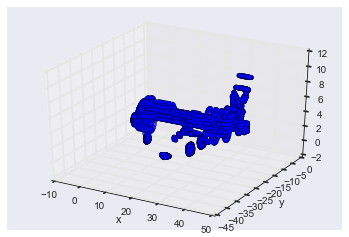

In [254]:
data_p= pd.read_csv('planes/plane1.csv')
rel_col = ['Start X','Start Y','Start Z','End X','End Y','End Z']
data = data_p[rel_col]
data_1 = data[['Start X','Start Y','Start Z']]
data_2 = data[['End X','End Y','End Z']]
data_2.columns = ['Start X','Start Y','Start Z']
data_pl = pd.concat((data_1,data_2),axis=0)
print 'STD:\n',data_pl.std()
# data_pl['number']= np.ones((data_car.shape[0],1))
ax = plt.axes(projection='3d')
x = data_pl['Start X']
y = data_pl['Start Y']
z = data_pl['Start Z']
plt.xlabel('x')
plt.ylabel('y')
ax.scatter(x, y, z)

In [449]:
pl_dict = {'width': [], 'height': [],'length':[],'number':[],
             'ratio_xy':[],'ratio_midz':[],'ratio_mid_pts':[],
             'ratio_xz':[],'ratio_yz':[],'y_var_ratio':[]}
#Extract Shape
for i in xrange(1,92):
    print i
    filename = 'planes/plane'+str(i)+'.csv'
    load_dat = pd.read_csv(filename)
    dat_1 = load_dat[['Start X','Start Y','Start Z']]
    dat_2 = load_dat[['End X','End Y','End Z']]
    dat_2.columns = ['Start X','Start Y','Start Z']
    dat_new = pd.concat((dat_1,dat_2),axis=0)
    dat_new = dat_new.dropna(axis=0)
    columns = dat_new.columns
    dat_new = (dat_new -dat_new.mean())/np.linalg.norm(dat_new.values)
#     for col in columns:
#         try:
#             dat_new = dat_new[(dat_new[col]<np.percentile(dat_new[col],100))
#                           &(dat_new[col]>np.percentile(dat_new[col],0))]
#         except:
#             continue
    dat_new = (dat_new -dat_new.mean())/np.linalg.norm(dat_new.values)#dat_new.std().mean()
    # find highest, lowest standard deviation vector and orient the model accordingly
    highest = np.where(dat_new.std()==dat_new.std().max())[0][0]
    lowest = np.where(dat_new.std()==dat_new.std().min())[0][0]
    if highest == 1:
        dat_new = np.dot(dat_new.values,rotateZMatrix(math.pi/2))
    elif highest == 2:
        dat_new = np.dot(dat_new.values,rotateYMatrix(math.pi/2))
    dat_new = pd.DataFrame(dat_new, columns = ['Start X','Start Y','Start Z'])
    if lowest == 0:
        dat_new = np.dot(dat_new.values,rotateZMatrix(math.pi/2))
    elif highest == 2:
        dat_new = np.dot(dat_new.values,rotateXMatrix(math.pi/2))
    dat_new = pd.DataFrame(dat_new, columns = ['Start X','Start Y','Start Z'])
    dat_new['number']= np.ones((dat_new.shape[0],1))*i
    #scale xyz to 0-1.0
#     dat_new['Start X'] = dat_new['Start X']*1.0/(dat_new['Start X'].max()-dat_new['Start X'].min())
#     dat_new['Start Y'] = dat_new['Start Y']*1.0/(dat_new['Start X'].max()-dat_new['Start X'].min())
#     dat_new['Start Z'] = dat_new['Start Z']*1.0/(dat_new['Start X'].max()-dat_new['Start X'].min())
#     #max and min xyz, use percentile to eliminate outlying point
#     max_x = np.percentile(dat_new['Start X'].values, 99)
#     max_y = np.percentile(dat_new['Start Y'].values, 99)
#     max_z =np.percentile(dat_new['Start Z'].values, 99)
#     min_x = np.percentile(dat_new['Start X'].values, 1)
#     min_y = np.percentile(dat_new['Start Y'].values, 1)
#     min_z =np.percentile(dat_new['Start Z'].values, 1)
    #max and min xyz after scale
    max_x = dat_new['Start X'].max()
    max_y = dat_new['Start Y'].max()
    max_z = dat_new['Start Z'].max()
    min_x = dat_new['Start X'].min()
    min_y = dat_new['Start Y'].min()
    min_z = dat_new['Start Z'].min()
    #calculate width height length
    width = max_y - min_y
    length = max_x - min_x
    height = max_z - min_z
    #ratio of length and width
    ratio_xy = float((max_x - min_x))/(
        max_y - min_y)
    ratio_xz = float((max_x - min_x))/(
        max_z - min_z)
    ratio_yz = float((max_y - min_y))/(
        max_z - min_z)
    #ratio of points above and below midpoint in the z direction
    midz = dat_new['Start Z'].mean()
    z_pts_above = dat_new[dat_new['Start Z']>midz]['Start Z'].count()
    z_pts_below = dat_new[dat_new['Start Z']<midz]['Start Z'].count()
    ratio_mid_pts = float(z_pts_above)/z_pts_below
    zabove = max_z - midz
    zbelow = midz - min_z
    ratio_midz = float(zabove)/zbelow
    #detect wings through diff of median and mean in the y direction
    y_var_ratio = wing_detect(dat_new)
    #append to dictionary
    pl_dict['width'].append(width)
    pl_dict['length'].append(length)
    pl_dict['height'].append(height)
    pl_dict['ratio_xy'].append(ratio_xy)
    pl_dict['ratio_xz'].append(ratio_xz)
    pl_dict['ratio_yz'].append(ratio_yz)
    pl_dict['ratio_midz'].append(ratio_midz)
    pl_dict['ratio_mid_pts'].append(ratio_mid_pts)
    pl_dict['y_var_ratio'].append(y_var_ratio)
    pl_dict['number'].append(i)
pl_feat = pd.DataFrame(data=pl_dict, index=range(len(pl_dict['width'])))
pl_feat['y'] = np.array(['2']*pl_feat.shape[0])
#pl_feat = pl_feat.drop('number', axis=1)
pl_feat.head(5)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91


,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio,y
0,0.007856,0.031199,1,1.400082,2.286646,1.221554,3.971105,3.250864,0.025540,-0.705790,2
1,0.004590,0.010381,2,2.507798,1.140386,1.305395,2.261884,1.732720,0.007953,-0.524307,2
2,0.002185,0.009097,3,0.537662,2.656561,1.228070,4.162784,3.389698,0.007407,-4.773122,2
3,0.005491,0.023398,4,1.737579,3.031676,1.136395,4.260957,3.749538,0.020590,-0.571258,2
4,0.005259,0.017160,5,0.521428,2.471792,1.054188,3.262958,3.095234,0.016278,-1.574360,2


# EDA

Removing Outlier

In [452]:
data_feat.head()

,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio,y
0,0.002926,0.005267,1,0.841634,0.524142,0.305753,1.799667,0.550253,0.001610,-0.923553,0
1,0.003041,0.002003,2,0.690273,0.937679,2.833047,0.658594,1.865827,0.005674,-1.429172,0
2,0.002828,0.001658,3,0.904362,1.116106,3.822140,0.586214,2.240593,0.006337,-1.014673,0
3,0.003132,0.002110,4,0.761389,1.015517,2.861474,0.673473,1.927125,0.006036,-1.208261,0
4,0.002030,0.001772,5,0.637863,1.765185,2.294370,0.872480,2.001791,0.004065,-1.933136,0


In [453]:
car_feat.describe()

,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,0.004929,0.017850,58.000000,1.210915,1.471223,2.182961,3.775746,2.166598,0.016625,-1.141967
std,0.004759,0.027423,33.341666,2.280110,0.937173,0.559302,2.633402,2.881825,0.075935,0.620811
min,0.000587,0.001934,1.000000,0.207784,0.067771,0.020676,0.407302,0.907795,0.002011,-4.566245
25%,0.002556,0.008574,29.500000,0.747194,1.063945,2.064255,2.817800,1.283896,0.004050,-1.255968
50%,0.003573,0.012259,58.000000,0.926929,1.295740,2.261053,3.344903,1.442076,0.005504,-1.094061
75%,0.005913,0.018705,86.500000,1.056138,1.589917,2.471698,3.793760,1.676993,0.008722,-0.895314
max,0.039157,0.279669,115.000000,23.463255,7.890621,3.556141,22.713883,19.699373,0.771371,1.192392


In [454]:
pl_feat.describe()

,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio
count,91.000000,91.000000,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,0.007230,0.037274,46.00000,1.115453,4.536450,1.596031,5.945497,4.132376,0.027268,-0.972550
std,0.005793,0.087015,26.41338,0.532428,21.275408,1.976558,17.171814,6.019602,0.041164,0.537925
min,0.001153,0.003043,1.00000,0.188590,0.071233,0.147583,0.680639,0.550419,0.003279,-4.773122
25%,0.004506,0.016895,23.50000,0.741898,1.605973,0.968424,3.124630,2.577414,0.012830,-1.164689
50%,0.005594,0.021570,46.00000,1.007739,2.394475,1.118073,3.732025,3.305770,0.018310,-0.897570
75%,0.008277,0.030926,68.50000,1.378490,2.934322,1.430667,4.357812,3.744818,0.026217,-0.652865
max,0.046854,0.784318,91.00000,3.000000,205.018274,14.036993,164.518932,49.312539,0.303121,-0.128236


In [280]:
# for col in car_feat.columns[:-1]:
#     plt.figure(figsize=(5,5))
#     car_feat[col].hist()

In [455]:
data_out = data_feat
car_out = car_feat
pl_out = pl_feat
columns = data_out.columns.drop(['number','y'])
for col in columns:
    data_out = data_out[(data_out[col]<np.percentile(data_out[col],100))]
#        &(data_out[col]>np.percentile(data_out[col],0))]
#     data_out = data_out[(data_out[col]<data_out[col].max())]
#         &(data_out[col]>data_out[col].min())]
for col in columns:
    car_out = car_out[(car_out[col]<np.percentile(car_out[col],100))]
#        &(car_out[col]>np.percentile(car_out[col],0))]
#     car_out = car_out[(car_out[col]<car_out[col].max())]
#         &(car_out[col]>car_out[col].min())]
for col in columns:
    pl_out = pl_out[(pl_out[col]<np.percentile(pl_out[col],100))]
#        &(pl_out[col]>np.percentile(pl_out[col],0))]
#     pl_out = pl_out[(pl_out[col]<pl_out[col].max())]
#         &(pl_out[col]>pl_out[col].min())]
                                              

In [456]:
data_out.describe()

,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,0.003082,0.004142,49.455556,0.910137,1.139830,1.492994,1.441478,1.305611,0.004205,-1.246320
std,0.001477,0.002605,29.305505,0.266219,0.357163,1.270063,0.731508,0.684372,0.003394,0.402656
min,0.000300,0.000425,1.000000,0.458149,0.363942,0.150816,0.426582,0.237502,0.000271,-2.659454
25%,0.002104,0.002182,23.250000,0.694938,0.905207,0.322423,0.673473,0.662998,0.001621,-1.429172
50%,0.002925,0.003650,49.500000,0.844511,1.098419,0.671794,1.652560,1.245116,0.003037,-1.208261
75%,0.003678,0.005267,74.750000,1.077612,1.310287,2.790806,2.093607,1.870342,0.005947,-0.926282
max,0.008255,0.011457,99.000000,1.870759,2.101147,4.504946,2.793953,3.605055,0.016723,-0.590900


In [457]:
car_out.describe()

,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.004525,0.014563,57.632075,0.943666,1.451081,2.231683,3.364973,1.601469,0.006645,-1.139947
std,0.003141,0.009227,33.040617,0.305644,0.698390,0.463292,0.927600,0.694474,0.004177,0.422210
min,0.000982,0.001934,1.000000,0.343106,0.215326,0.337849,0.975723,0.907795,0.002011,-4.230689
25%,0.002547,0.008424,29.250000,0.747534,1.089331,2.124504,2.814706,1.279127,0.003958,-1.241394
50%,0.003549,0.011451,58.500000,0.926853,1.308330,2.267086,3.329183,1.438322,0.005346,-1.094435
75%,0.005737,0.018560,85.750000,1.032185,1.585563,2.474287,3.696348,1.633440,0.008284,-0.906620
max,0.018391,0.051877,115.000000,2.283786,6.198426,3.102146,7.959049,4.878882,0.027602,-0.577572


In [458]:
pl_out.describe()

,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,0.006613,0.022409,46.268293,1.086228,2.391586,1.376005,3.697967,3.190583,0.019717,-1.004554
std,0.003828,0.010383,27.123881,0.444840,1.025050,1.236253,1.421162,1.097899,0.010288,0.536993
min,0.001153,0.003043,1.000000,0.466384,0.283841,0.147583,0.680639,0.639408,0.004314,-4.773122
25%,0.004478,0.016650,24.250000,0.745352,1.727060,1.012481,3.041003,2.573506,0.012816,-1.168340
50%,0.005516,0.020804,46.000000,1.006685,2.446856,1.119302,3.659913,3.189168,0.017895,-0.925425
75%,0.007626,0.030018,70.750000,1.236756,2.953936,1.426356,4.206595,3.677246,0.025227,-0.674367
max,0.024086,0.057189,91.000000,2.507798,5.545553,10.159208,9.042080,6.767129,0.055945,-0.439447


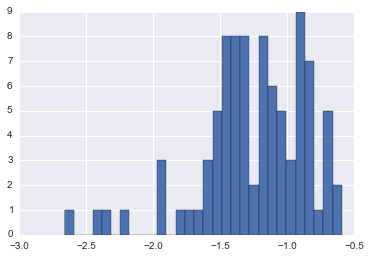

In [478]:
data_out['y_var_ratio'].hist(bins=30)

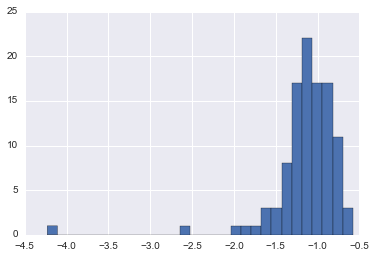

In [479]:
car_out['y_var_ratio'].hist(bins=30)

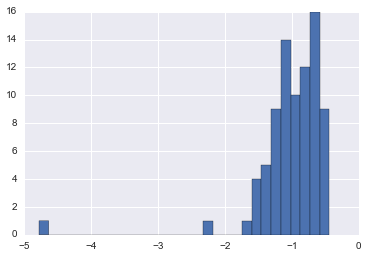

In [480]:
pl_out['y_var_ratio'].hist(bins=30)

# Model

In [459]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix

In [460]:
#add class type to number
data_out['number'] = 'motor' + data_out['number'].astype(str) 
car_out['number'] = 'car' + car_out['number'].astype(str)
pl_out['number'] = 'plane'+ pl_out['number'].astype(str)

In [467]:
data_all= pd.concat((car_out,data_out,pl_out),axis=0)
data_all.reset_index(drop=True,inplace=True)
ind = np.random.choice(data_all.index, size=data_all.shape[0], replace=False)
data_all = data_all.iloc[ind,:]
col = data_all.columns.drop(['number','y'])
data_sc = preprocessing.scale(data_all[col])
data_all[col] = data_sc
data_all.reset_index(drop=True,inplace=True)
data_all.head()

,height,length,number,ratio_mid_pts,ratio_midz,ratio_xy,ratio_xz,ratio_yz,width,y_var_ratio,y
0,-0.904759,-0.897096,motor40,-0.128212,-0.374538,-1.267796,-0.460626,-1.045265,-0.913600,-0.620742,0
1,0.560643,0.618401,plane8,-1.161653,1.328588,-0.565229,0.188525,0.693324,0.905443,0.053185,2
2,0.455203,1.351702,car45,-0.495642,-0.302587,0.894283,1.215461,-0.252788,0.072114,0.337179,1
3,-0.033652,0.469929,plane65,-0.274381,1.135973,-0.567096,0.865657,1.449720,0.752062,1.004129,2
4,-0.271186,-0.066486,car59,-1.816058,1.795411,0.415013,0.372826,-0.380519,-0.423651,-1.880114,1


In [468]:
#data_all[['height','length','width']].hist()
#data_all.hist()

In [469]:
data_all = data_all.dropna(axis=0)
print data_all.info()
num_ind = data_all['number'].values
Y = data_all['y'].values
X = data_all.drop(['y','number'],axis=1)
col = X.columns
X = X.values
# X = preprocessing.scale(X)
#X = data_all[['ratio_midz','ratio_xy']].values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 277
Data columns (total 11 columns):
height           278 non-null float64
length           278 non-null float64
number           278 non-null object
ratio_mid_pts    278 non-null float64
ratio_midz       278 non-null float64
ratio_xy         278 non-null float64
ratio_xz         278 non-null float64
ratio_yz         278 non-null float64
width            278 non-null float64
y_var_ratio      278 non-null float64
y                278 non-null object
dtypes: float64(9), object(2)
memory usage: 26.1+ KB
None


In [470]:
svm = SVC(class_weight='balanced',probability=True)
knn = KNeighborsClassifier()
lg = LogisticRegression(class_weight='balanced')
tree = DecisionTreeClassifier()
rf = RandomForestClassifier(class_weight='balanced')

In [471]:
print 'SVM:', np.mean(cross_val_score(svm, X, Y, cv=5, scoring='accuracy'))
print 'KNN:',np.mean(cross_val_score(knn, X, Y,cv=5, scoring='accuracy'))
print 'Logistic Regression:',np.mean(cross_val_score(lg, X, Y, cv=5, scoring='accuracy'))
print 'Decision Tree:',np.mean(cross_val_score(tree, X, Y, cv=5, scoring='accuracy'))
print 'Random Forest:',np.mean(cross_val_score(rf, X, Y, cv=5, scoring='accuracy'))

SVM: 0.957068808385
KNN: 0.94973342447
Logistic Regression: 0.899336978811
Decision Tree: 0.885051264525
Random Forest: 0.917393483709


In [466]:
#KFolds
from sklearn.cross_validation import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(4, n_folds=2) 
for train_index, test_index in kf:
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

('TRAIN:', array([2, 3]), 'TEST:', array([0, 1]))
('TRAIN:', array([0, 1]), 'TEST:', array([2, 3]))


In [472]:
#Random Forest Feature importance
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)
rf.fit(X_train, y_train)
zip(col,rf.feature_importances_)

[('height', 0.03530281841945241),
 ('length', 0.17034423646632438),
 ('ratio_mid_pts', 0.023584669363348184),
 ('ratio_midz', 0.053767084393066156),
 ('ratio_xy', 0.076990812642846199),
 ('ratio_xz', 0.19661903503382),
 ('ratio_yz', 0.1947796709134669),
 ('width', 0.20805148082599229),
 ('y_var_ratio', 0.040560191941683525)]

# Confusion Matrices

In [473]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
#     tick_marks = np.arange(len(iris.target_names))
#     plt.xticks(tick_marks, iris.target_names, rotation=45)
#     plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [474]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(3)

In [475]:
# Split the data into a training set and a test set
runs = 50
num_svm = []
num_knn = []
num_lg =[]
num_tree=[]
num_rf = []
for i in range(runs):
    Y = data_all['y'].values
    X = data_all.drop(['y'],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y)
    X_train = X_train.drop(['number'],axis=1)
    num_ind = X_test['number'].values
    X_test = X_test.drop(['number'],axis=1)

    # Run classifier, using a model that is too regularized (C too low) to see
    # the impact on the results
    y_svm = svm.fit(X_train, y_train).predict(X_test)
    y_knn = knn.fit(X_train, y_train).predict(X_test)
    y_lg = lg.fit(X_train, y_train).predict(X_test)
    y_tree = tree.fit(X_train, y_train).predict(X_test)
    y_rf = rf.fit(X_train, y_train).predict(X_test)

#     print "SVM:\n", confusion_matrix(y_test,y_svm)
#     print "KNN:\n", confusion_matrix(y_test,y_knn)
#     print "LG:\n", confusion_matrix(y_test,y_lg)
#     print "TREE:\n", confusion_matrix(y_test,y_tree)
#     print "RF:\n", confusion_matrix(y_test,y_rf)
    #svm
    ind_svm = np.where(y_svm!=y_test)
    num_svm.extend(list(num_ind[ind_svm]))
    #knn
    ind_knn = np.where(y_knn!=y_test)
    num_knn.extend(list(num_ind[ind_knn]))
    #lg
    ind_lg = np.where(y_lg!=y_test)
    num_lg.extend(list(num_ind[ind_lg]))
    #tree
    ind_tree = np.where(y_tree!=y_test)
    num_tree.extend(list(num_ind[ind_tree]))
    #rf
    ind_rf = np.where(y_rf!=y_test)
    num_rf.extend(list(num_ind[ind_rf]))
print 'SVM misclassified:',Most_Common(num_svm)
print 'KNN misclassified:',Most_Common(num_knn)
print 'LG misclassified:',Most_Common(num_lg)
print 'DTree misclassified:',Most_Common(num_rf)
print 'RF misclassified:',Most_Common(num_rf)

SVM misclassified: [('car87', 18), ('motor72', 17), ('plane68', 15)]
KNN misclassified: [('car87', 18), ('plane3', 16), ('plane25', 15)]
LG misclassified: [('car87', 18), ('motor72', 17), ('car21', 16)]
DTree misclassified: [('car87', 18), ('motor94', 17), ('plane25', 15)]
RF misclassified: [('car87', 18), ('motor94', 17), ('plane25', 15)]


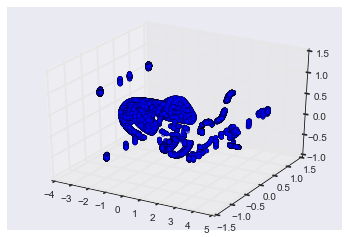

In [476]:
data= pd.read_csv('planes/plane62.csv')
rel_col = ['Start X','Start Y','Start Z','End X','End Y','End Z']
data = data[rel_col]
data_1 = data[['Start X','Start Y','Start Z']]
data_2 = data[['End X','End Y','End Z']]
data_2.columns = ['Start X','Start Y','Start Z']
data_motor = pd.concat((data_1,data_2),axis=0)
data_motor = data_motor.dropna(axis=0)
data_motor_sc = (data_motor-data_motor.mean())/data_motor.std().mean()

#Plot
fig = plt.figure()
data_plot = pd.DataFrame(data_motor_sc, columns = ['Start X','Start Y','Start Z'])
ax = plt.axes(projection='3d')
x = data_plot['Start X']
y = data_plot['Start Y']
z = data_plot['Start Z']
ax.scatter(x, y, z)
plt.show()

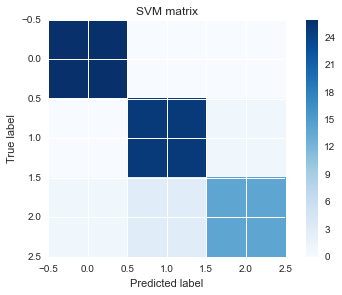

In [477]:
cm_svm = confusion_matrix(y_test,y_svm)

plot_confusion_matrix(cm_svm, title='SVM matrix')

# Experiment

In [ ]:
# #scale xyz to 0-1.0
# data_car['Start X'] = data_car['Start X']*1.0/(data_car.max().max()-data_car.min().min())
# data_car['Start Y'] = data_car['Start Y']*1.0/(data_car.max().max()-data_car.min().min())
# data_car['Start Z'] = data_car['Start Z']*1.0/(data_car.max().max()-data_car.min().min())
# #calculate width height length
# width = data_car['Start Y'].max() - data_car['Start Y'].min()
# length = data_car['Start X'].max() - data_car['Start X'].min()
# height = data_car['Start Z'].max() - data_car['Start Z'].min()
# number = data_car['number'][0]
# #ratio of length and width
# ratio_xy = (data_car['Start Y'].max() - data_car['Start Y'].min())/(
#     data_car['Start X'].max() - data_car['Start X'].min())
# #ration of points above and below midpoint in the z direction
# midz = (data_car['Start Z'].max() + data_car['Start Z'].min())/2.0
# zabove = data_car[data_car['Start Z']>midz]['Start Z'].count()
# zbelow = data_car[data_car['Start Z']<midz]['Start Z'].count()
# ratio_midz = float(zabove)/zbelow
# print zabove
# print zbelow
# car_dict = {'width': [width], 'height': [height],'length':[length],'number':[1],
#            'ratio_xy':[ratio_xy],'ratio_midz':[ratio_midz]}
# car_feat = pd.DataFrame(data=car_dict, index=range(1))
# car_feat


In [9]:
#Neural Nets
import lasagne
l_in = lasagne.layers.InputLayer((100, 50))
l_hidden = lasagne.layers.DenseLayer(l_in, num_units=200)
l_out = lasagne.layers.DenseLayer(l_hidden, num_units=10,
                                nonlinearity=T.nnet.softmax)



ImportError: No module named lasagne

In [376]:
# #diff between predicted y probability and actual y
#getting misclassified data
# y_svm_p = svm.fit(X_train, y_train).predict_proba(X_test)
# y_knn_p = knn.fit(X_train, y_train).predict_proba(X_test)
# y_lg_p = lg.fit(X_train, y_train).predict_proba(X_test)
# y_tree_p = tree.fit(X_train, y_train).predict_proba(X_test)
# y_rf_p = rf.fit(X_train, y_train).predict_proba(X_test)
# y_miss = np.zeros((y_test.shape))
# # for i in range(len(y_test)):
# #     y_miss[i] = 1-y_rf_p[i][y_test[i]]
# # ind_miss = np.where(y_miss>0.5)

In [ ]:
# for i in xrange(2,93):
#     filename = 'motorcycles/motor'+str(i)+'.csv'
#     load_dat = pd.read_csv(filename)
#     dat_1 = load_dat[['Start X','Start Y','Start Z']]
#     dat_2 = data[['End X','End Y','End Z']]
#     dat_2.columns = ['Start X','Start Y','Start Z']
#     dat_new = pd.concat((dat_1,dat_2),axis=0)
#     dat_new['number']= np.ones((dat_new.shape[0],1))*i
#     dat_new = dat_new.dropna(
# #     print dat_new.shape
# #     print i
#     data_motor = pd.concat((data_motor, dat_new),axis=0)
# data_motor.shape

In [ ]:
# #calculate width length height
# width = data_motor['Start Y'].max() - data_motor['Start Y'].min()
# length = data_motor['Start X'].max() - data_motor['Start X'].min()
# height = data_motor['Start Z'].max() - data_motor['Start Z'].min()
# number = data_motor['number'][0]
# #ratio of length and width
# ratio_xy = (data_motor['Start Y'].max() - data_motor['Start Y'].min())/(
#     data_motor['Start X'].max() - data_motor['Start X'].min())
# #ratio of points above and below midpoint in the z direction
# #midz = (data_motor['Start Z'].max() + data_motor['Start Z'].min())/2.0
# midz = (data_motor['Start Z'].mean())
# zabove = data_motor[data_motor['Start Z']>midz]['Start Z'].count()
# zbelow = data_motor[data_motor['Start Z']<midz]['Start Z'].count()
# ratio_midz = float(zabove)/zbelow
# print zabove
# print zbelow
# motor_dict = {'width': [width], 'height': [height],'length':[length],'number':[1],
#              'ratio_xy':[ratio_xy],'ratio_midz':[ratio_midz]}
# data_feat = pd.DataFrame(data=motor_dict, index=range(1))
# data_feat


In [ ]:
def remove_m(string):
    return string[0:-1]

In [ ]:
df['X'] = df['X'].apply(remove_m)
df['Y'] = df['Y'].apply(remove_m)
df['Z'] = df['Z'].apply(remove_m)

In [ ]:
df = df.astype(float)
df.head()

In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
x = df['X']
y = df['Y']
z = df['Z']
ax.scatter(x, y, z)
plt.show()

In [ ]:
(data_all['width'].mean())

In [ ]:
#car 56 had a problem
df = pd.read_csv('motorcycles/motor79.csv')
dat_1 = df[['Start X','Start Y','Start Z']]
dat_2 = df[['End X','End Y','End Z']]
dat_2.columns = ['Start X','Start Y','Start Z']
dat_new = pd.concat((dat_1,dat_2),axis=0)
dat_new = dat_new.dropna(axis=0)
dat_new = pd.DataFrame(data=dat_new, columns=['Start X','Start Y','Start Z'])  
dat_new['number']= np.ones((dat_new.shape[0],1))*i
dat_new = dat_new.dropna()
max_x = dat_new['Start X'].max()
max_y = dat_new['Start Y'].max()
max_z = dat_new['Start Z'].max()
min_x = dat_new['Start X'].min()
min_y = dat_new['Start Y'].min()
min_z = dat_new['Start Z'].min()
width = dat_new['Start Y'].max() - dat_new['Start Y'].min()
length = dat_new['Start X'].max() - dat_new['Start X'].min()
height = dat_new['Start Z'].max() - dat_new['Start Z'].min()
midz = dat_new['Start Z'].mean()
z_pts_above = dat_new[dat_new['Start Z']>midz]['Start Z'].count()
z_pts_below = dat_new[dat_new['Start Z']<midz]['Start Z'].count()
ratio_mid_pts = float(z_pts_above)/z_pts_below
zabove = max_z - midz
zbelow = midz - min_z
ratio_midz = float(zabove)/zbelow
ratio_midz

In [ ]:
    #max and min xyz, use percentile to eliminate outlying point
#     max_x = np.percentile(dat_new['Start X'].values, 99)
#     max_y = np.percentile(dat_new['Start Y'].values, 99)
#     max_z =np.percentile(dat_new['Start Z'].values, 99)
#     min_x = np.percentile(dat_new['Start X'].values, 1)
#     min_y = np.percentile(dat_new['Start Y'].values, 1)
#     min_z =np.percentile(dat_new['Start Z'].values, 1)
    #scale
#     dat_new['Start X'] = dat_new['Start X']*1.0/(dat_new['Start X'].max())
#     dat_new['Start Y'] = dat_new['Start Y']*1.0/(dat_new['Start X'].max())
#     dat_new['Start Z'] = dat_new['Start Z']*1.0/(dat_new['Start X'].max())
#     dat_new['Start X'] = dat_new['Start X']*1.0/(max([max_x,max_y,max_z])-min([min_x,min_y,min_z]))
#     dat_new['Start Y'] = dat_new['Start Y']*1.0/(max([max_x,max_y,max_z])-min([min_x,min_y,min_z]))
#     dat_new['Start Z'] = dat_new['Start Z']*1.0/(max([max_x,max_y,max_z])-min([min_x,min_y,min_z]))

In [6]:
# # a = np.array([1,2,3,None)
# a = z_max_y(data_motor_sc).copy()
# a = np.nan_to_num(a)
# a